# Brazilian High School National Exam (ENEM 2019)
The ENEM exam comprises of 180 multiple-choice questions and tests students in five main areas, namely natural sciences, math, human sciences, Portuguese and either English or Spanish as a foreign language. Students are also required to write an essay.

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#The information provided by the INEP is standardized, this EDA will be configured to adapt to any desired year.
year= 2019
minimum_wage= 998.00

## Initial dataframe preparation

In [155]:
#Due the big size of original dataset, only essential information that will be used on this EDA are recovered
essentials= ['SG_UF_PROVA', 'SG_UF_RESIDENCIA', 'NO_MUNICIPIO_RESIDENCIA','NO_MUNICIPIO_PROVA','TP_SEXO', 'TP_COR_RACA', 'TP_ESCOLA', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
    'NU_NOTA_MT', 'TP_LINGUA', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
    'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q006', 'Q024', 'Q025']

In [156]:
#Loading dataset
df= pd.read_csv('input/AMOSTRA_ENEM_2019.csv', delimiter= ';', encoding= 'UTF-8')[essentials]
df.head(2)

,SG_UF_PROVA,SG_UF_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_PROVA,TP_SEXO,TP_COR_RACA,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,...,TP_LINGUA,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q006,Q024,Q025
0,MA,MA,Paço do Lumiar,Paço do Lumiar,F,1,1,434.7,479.4,435.3,...,1,100.0,120.0,80.0,100.0,100.0,500.0,B,A,A
1,SP,SP,Orlândia,Orlândia,F,5,2,NaN,408.1,507.3,...,1,80.0,120.0,120.0,100.0,80.0,500.0,C,A,A


In [158]:
columns_dictionary={
    'SG_UF_PROVA': 'Application State',
    'SG_UF_RESIDENCIA': 'Residence State',
    'NO_MUNICIPIO_PROVA': 'Application Municipality',
    'NO_MUNICIPIO_RESIDENCIA': 'Residence Municipality',
    'TP_SEXO': 'Gender',
    'TP_COR_RACA': 'Skincolor',
    'TP_ESCOLA': 'School Kind',
    'NU_NOTA_CN': 'Science Grade',
    'NU_NOTA_CH': 'Humanist Grade',
    'NU_NOTA_LC': 'Linguistic Grade',
    'NU_NOTA_MT': 'Math Grade',
    'TP_LINGUA': 'Foreign Languange',
    'NU_NOTA_COMP1': 'Essay Comp I',
    'NU_NOTA_COMP2': 'Essay Comp II',
    'NU_NOTA_COMP3': 'Essay Comp III', 
    'NU_NOTA_COMP4': 'Essay Comp IV', 
    'NU_NOTA_COMP5': 'Essay Comp V', 
    #More information about essay competences go to: https://bit.ly/3hHUhLx
    'NU_NOTA_REDACAO': 'Essay Grade',
    'Q006': 'Family Income',  
    'Q024': 'Computer in Home', 
    'Q025': 'Internet Acess',
}

skinColor_dictionary= {
    0:np.nan, #Undeclared
    1:'White',
    2:'Black',
    3:'Brown',
    4:'Yellow',
    5:'Indigenous'
}

school_dictionary= {
    1:np.nan, #Undeclared
    2:'Public',
    3:'Private',
}

income_dictionary={
    'A': 0,
    'B': f'Up to R${minimum_wage}',
    'C': f'R${minimum_wage+ 0.01} - R${1.5* minimum_wage}',
    'D': f'R${1.5*minimum_wage+ 0.01} - R${2* minimum_wage}',
    'E': f'R${2*minimum_wage+ 0.01} - R${2.5* minimum_wage}',
    'F': f'R${2.5*minimum_wage+ 0.01} - R${3* minimum_wage}',
    'G': f'R${3*minimum_wage+ 0.01} - R${4* minimum_wage}',
    'H': f'R${4*minimum_wage+ 0.01} - R${5* minimum_wage}',
    'I': f'R${5*minimum_wage+ 0.01} - R${6* minimum_wage}',
    'J': f'R${6*minimum_wage+ 0.01} - R${7* minimum_wage}',
    'K': f'R${7*minimum_wage+ 0.01} - R${8* minimum_wage}',
    'L': f'R${8*minimum_wage+ 0.01} - R${9* minimum_wage}',
    'M': f'R${9*minimum_wage+ 0.01} - R${10* minimum_wage}',
    'N': f'R${10*minimum_wage+ 0.01} - R${12* minimum_wage}',
    'O': f'R${12*minimum_wage+ 0.01} - R${15* minimum_wage}',
    'P': f'R${15*minimum_wage+ 0.01} - R${20* minimum_wage}',
    'Q': f'Above to R${20* minimum_wage}',
}

languange_dictionary= {
    0: 'English',
    1: 'Spanish',
}

gender_dictionary= {
    'F': 'Female',
    'M': 'Male'
}

computer_dictionary= {
    'A': 'None',
    'B': 'One',
    'C': 'Two',
    'D': 'Three',
    'E': 'Four or more',
}

internet_dictionary= {
    'A': 'No',
    'B': 'Yes',
}

In [159]:
#Mapping dataframe
df.rename(columns= columns_dictionary, inplace= True)
df['Gender']= df['Gender'].map(gender_dictionary)
df['Skincolor']= df['Skincolor'].map(skinColor_dictionary)
df['School Kind']= df['School Kind'].map(school_dictionary)
df['Foreign Languange']= df['Foreign Languange'].map(languange_dictionary)
df['Family Income']= df['Family Income'].map(income_dictionary)
df['Computer in Home']= df['Computer in Home'].map(computer_dictionary)
df['Internet Acess']= df['Internet Acess'].map(internet_dictionary)

In [160]:
df.head()

,Application State,Residence State,Residence Municipality,Application Municipality,Gender,Skincolor,School Kind,Science Grade,Humanist Grade,Linguistic Grade,...,Foreign Languange,Essay Comp I,Essay Comp II,Essay Comp III,Essay Comp IV,Essay Comp V,Essay Grade,Family Income,Computer in Home,Internet Acess
0,MA,MA,Paço do Lumiar,Paço do Lumiar,Female,White,NaN,434.7,479.4,435.3,...,Spanish,100.0,120.0,80.0,100.0,100.0,500.0,Up to R$998.0,None,No
1,SP,SP,Orlândia,Orlândia,Female,Indigenous,Public,NaN,408.1,507.3,...,Spanish,80.0,120.0,120.0,100.0,80.0,500.0,R$998.01 - R$1497.0,None,No
2,SP,SP,Sertãozinho,Sertãozinho,Male,White,Public,NaN,NaN,NaN,...,English,NaN,NaN,NaN,NaN,NaN,NaN,R$2994.01 - R$3992.0,One,Yes
3,AL,AL,Santana do Ipanema,Santana do Ipanema,Male,Brown,NaN,363.6,471.2,516.2,...,Spanish,140.0,120.0,100.0,100.0,100.0,560.0,Up to R$998.0,One,No
4,DF,DF,Brasília,Brasília,Male,Brown,NaN,681.1,673.2,622.2,...,English,160.0,140.0,140.0,160.0,140.0,740.0,R$11976.01 - R$14970.0,Two,Yes


## Dataframe basic informations

In [161]:
df.info(memory_usage= 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127382 entries, 0 to 127381
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Application State         127382 non-null  object 
 1   Residence State           127382 non-null  object 
 2   Residence Municipality    127382 non-null  object 
 3   Application Municipality  127382 non-null  object 
 4   Gender                    127382 non-null  object 
 5   Skincolor                 124694 non-null  object 
 6   School Kind               36796 non-null   object 
 7   Science Grade             92698 non-null   float64
 8   Humanist Grade            98007 non-null   float64
 9   Linguistic Grade          98007 non-null   float64
 10  Math Grade                92698 non-null   float64
 11  Foreign Languange         127382 non-null  object 
 12  Essay Comp I              98007 non-null   float64
 13  Essay Comp II             98007 non-null   f

In [162]:
print('Sum of null data. Purposely undeclared data was considered null.')
print('Null grades correspond to candidates who did not take the test due to no-show or elimination')
df.isna().sum()

Sum of null data. Purposely undeclared data was considered null.
Null grades correspond to candidates who did not take the test due to no-show or elimination


Application State               0
Residence State                 0
Residence Municipality          0
Application Municipality        0
Gender                          0
Skincolor                    2688
School Kind                 90586
Science Grade               34684
Humanist Grade              29375
Linguistic Grade            29375
Math Grade                  34684
Foreign Languange               0
Essay Comp I                29375
Essay Comp II               29375
Essay Comp III              29375
Essay Comp IV               29375
Essay Comp V                29375
Essay Grade                 29375
Family Income                   0
Computer in Home                0
Internet Acess                  0
dtype: int64

## Analysis
### Geographical

In [163]:
candidates= df.shape[0]
application_municipalities= len(df['Application Municipality'].unique())
residence_municipalities= len(df['Residence Municipality'].unique())
application_state= len(df['Application State'].unique())
residence_state= len(df['Residence State'].unique())

In [166]:
print(f'{candidates} candidates from {residence_municipalities} municipalities in {residence_state} states were registered for ENEM {year}.')

127382 candidates from 4909 municipalities in 27 states were registered for ENEM 2019.


The Brazilian territory is divided into 27 federative units, consisting of 26 states, plus the Federal District. According to the Brazilian Institute of Geography and Statistics (IBGE), Brazil has 5570 cities. 
This number is referred to in the last 2010 Census.

More informations: https://bit.ly/30UP8sO

In [170]:
print(f'Therefore, the national exam in {year} was conducted in {round(application_municipalities/5570, 2)*100}% of Brazilian municipalities, with candidates from {round(residence_municipalities/5570, 2)*100}% from all over Brazil.')

Therefore, the national exam in 2019 was conducted in 30.0% of Brazilian municipalities, with candidates from 88.0% from all over Brazil.


In [171]:
#Loading external data about the number of cities or town per brazilian regions
url='https://bit.ly/2X4VK6y'
print('Number of mubicipalities per brazilians regions')
regions= pd.read_html(url, thousands='.', encoding= 'UTF-8')[1][['Região','Municípios', ]].rename(columns= {'Região':'Region','Municípios':'Municipalities'})
regions_dictionary= {
    'Nordeste':'Northeast',
    'Norte':'North',
    'Centro-Oeste':'Midwest',
    'Sudeste':'Southeast',
    'Sul': 'South'
}
regions['Region']= regions['Region'].map(regions_dictionary)
regions

Number of mubicipalities per brazilians regions


,Region,Municipalities
0,Northeast,1794
1,Southeast,1668
2,South,1191
3,Midwest,466
4,North,450


In [178]:
#Counting the number of municipalities where the exam occured
SE_application= (df['Application State'] == 'ES') | (df['Application State'] == 'MG') | (df['Application State'] == 'RJ') | (df['Application State'] == 'SP')
SE_application= len(df[SE_application]['Application Municipality'].unique())

NE_application= (df['Application State'] == 'BA') | (df['Application State'] == 'SE') | (df['Application State'] == 'AL') | (df['Application State'] == 'PE') | (df['Application State'] == 'PB') | (df['Application State'] == 'RN') | (df['Application State'] == 'CE') | (df['Application State'] == 'MA') | (df['Application State'] == 'PI')
NE_application= len(df[NE_application]['Application Municipality'].unique())

S_application= (df['Application State'] == 'PR') | (df['Application State'] == 'RS') | (df['Application State'] == 'SC')
S_application= len(df[S_application]['Application Municipality'].unique())

NW_application= (df['Application State'] == 'GO') | (df['Application State'] == 'MS') | (df['Application State'] == 'MT')
NW_application= len(df[NW_application]['Application Municipality'].unique())

N_application= (df['Application State'] == 'AC') | (df['Application State'] == 'AM') | (df['Application State'] == 'RO') | (df['Application State'] == 'RR') | (df['Application State'] == 'AP') | (df['Application State'] == 'PA') | (df['Application State'] == 'TO')
N_application= len(df[N_application]['Application Municipality'].unique())

In [182]:
#Counting the number of municipalities where the candidates reside
SE_residence= (df['Residence State'] == 'ES') | (df['Residence State'] == 'MG') | (df['Residence State'] == 'RJ') | (df['Residence State'] == 'SP')
SE_residence= len(df[SE_residence]['Residence Municipality'].unique())

NE_residence= (df['Residence State'] == 'BA') | (df['Residence State'] == 'SE') | (df['Residence State'] == 'AL') | (df['Residence State'] == 'PE') | (df['Residence State'] == 'PB') | (df['Residence State'] == 'RN') | (df['Residence State'] == 'CE') | (df['Residence State'] == 'MA') | (df['Residence State'] == 'PI')
NE_residence= len(df[NE_residence]['Residence Municipality'].unique())

S_residence= (df['Residence State'] == 'PR') | (df['Residence State'] == 'RS') | (df['Residence State'] == 'SC')
S_residence= len(df[S_residence]['Residence Municipality'].unique())

NW_residence= (df['Residence State'] == 'GO') | (df['Residence State'] == 'MS') | (df['Residence State'] == 'MT')
NW_residence= len(df[NW_residence]['Residence Municipality'].unique())

N_residence= (df['Residence State'] == 'AC') | (df['Residence State'] == 'AM') | (df['Residence State'] == 'RO') | (df['Residence State'] == 'RR') | (df['Residence State'] == 'AP') | (df['Residence State'] == 'PA') | (df['Residence State'] == 'TO')
N_residence= len(df[N_residence]['Residence Municipality'].unique())

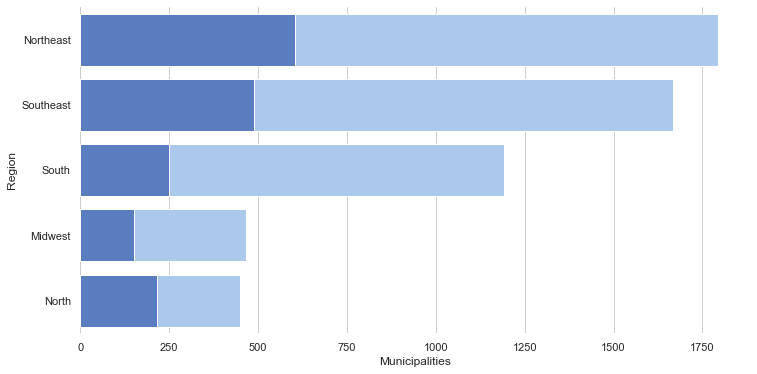

In [183]:
ax = plt.subplots(figsize=(12, 6))
sns.set_color_codes('pastel')
sns.barplot(x= 'Municipalities', y= 'Region', data= regions, label= 'Total', color= 'b')
sns.set_color_codes('muted')
sns.barplot(x= [NE_application, SE_application, S_application, NW_application, N_application], y= 'Region', data= regions, label= 'Applied ENEM', color= 'b')
sns.despine(left=True, bottom=True)

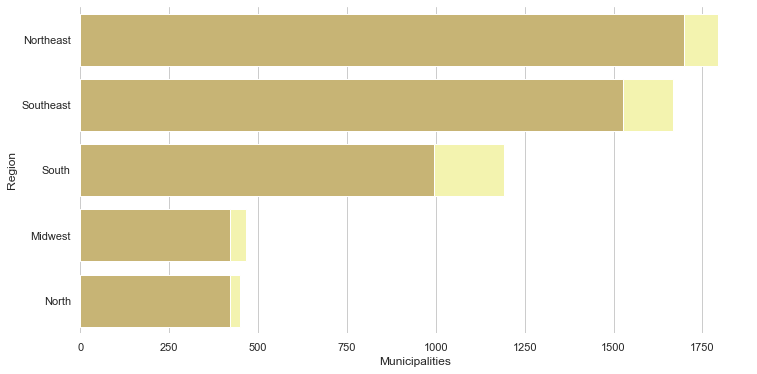

In [185]:
ax = plt.subplots(figsize=(12, 6))
sns.set_color_codes('pastel')
sns.barplot(x= 'Municipalities', y= 'Region', data= regions, label= 'Total', color= 'y')
sns.set_color_codes('muted')
sns.barplot(x= [NE_residence, SE_residence, S_residence, NW_residence, N_residence], y= 'Region', data= regions, label= 'Applied ENEM', color= 'y')
sns.despine(left=True, bottom=True)

In [196]:
print(f'In northeast region, the ENEM exam was applied in {round(NE_application/regions.Municipalities[0], 1)*100}% of the municipalities with representatives of {round(NE_residence/regions.Municipalities[0], 1)*100}% the state.')
print(f'In southeast region, the ENEM exam was applied in {round(SE_application/regions.Municipalities[1], 1)*100}% of the municipalities with representatives of {round(SE_residence/regions.Municipalities[0], 1)*100}% the state.')
print(f'In south region, the ENEM exam was applied in {round(S_application/regions.Municipalities[2], 1)*100}% of the municipalities with representatives of {round(S_residence/regions.Municipalities[0], 1)*100}% the state.')
print(f'In midwest region, the ENEM exam was applied in {round(NW_application/regions.Municipalities[3], 1)*100}% of the municipalities with representatives of {round(NW_residence/regions.Municipalities[0], 1)*100}% the state.')
print(f'In north region, the ENEM exam was applied in {round(N_application/regions.Municipalities[4], 1)*100}% of the municipalities with representatives of {round(N_residence/regions.Municipalities[0], 1)*100}% the state.')

In northeast region, the ENEM exam was applied in 30.0% of the municipalities with representatives of 90.0% the state.
In southeast region, the ENEM exam was applied in 30.0% of the municipalities with representatives of 90.0% the state.
In south region, the ENEM exam was applied in 20.0% of the municipalities with representatives of 60.0% the state.
In midwest region, the ENEM exam was applied in 30.0% of the municipalities with representatives of 20.0% the state.
In north region, the ENEM exam was applied in 50.0% of the municipalities with representatives of 20.0% the state.


In [198]:
diff_municipality= len(df[df['Application Municipality'] != df['Residence Municipality']])
diff_state= len(df[df['Application State'] != df['Residence State']])

print(f'{round(diff_municipality/candidates, 2)*100}% of candidates chosen a diferent municipality from their residence.')
print(f'{round(diff_state/candidates, 2)*100}% of candidates chosen a diferent state from their residence.')

17.0% of candidates chosen a diferent municipality from their residence.
1.0% of candidates chosen a diferent state from their residence.


### Grades